In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import scipy.sparse
import matplotlib.pyplot as plt

from pyinverse.phantom import Phantom
from pyinverse.axis import RegularAxis
from pyinverse.grid import RegularGrid

In [3]:
Nx = 64
Ny = 64
Na = 64
Np = 64

In [4]:
R_fname = f'/tmp/R_{Nx}_{Ny}_{Na}_{Na}.npz'
R = scipy.sparse.load_npz(R_fname)

In [5]:
R.shape

(4096, 4096)

In [6]:
axis_x = RegularAxis.linspace(-1, 1, Nx)
axis_y = RegularAxis.linspace(-1, 1, Ny)
axis_t = RegularAxis.linspace(-1, 1, Np)
axis_theta = RegularAxis.linspace(0, 180, Na, endpoint=False)

In [7]:
grid = RegularGrid(axis_x, axis_y)
grid_y = RegularGrid(axis_theta, axis_t)

In [8]:
p = Phantom()
x = p.raster(grid)

<IPython.core.display.Javascript object>


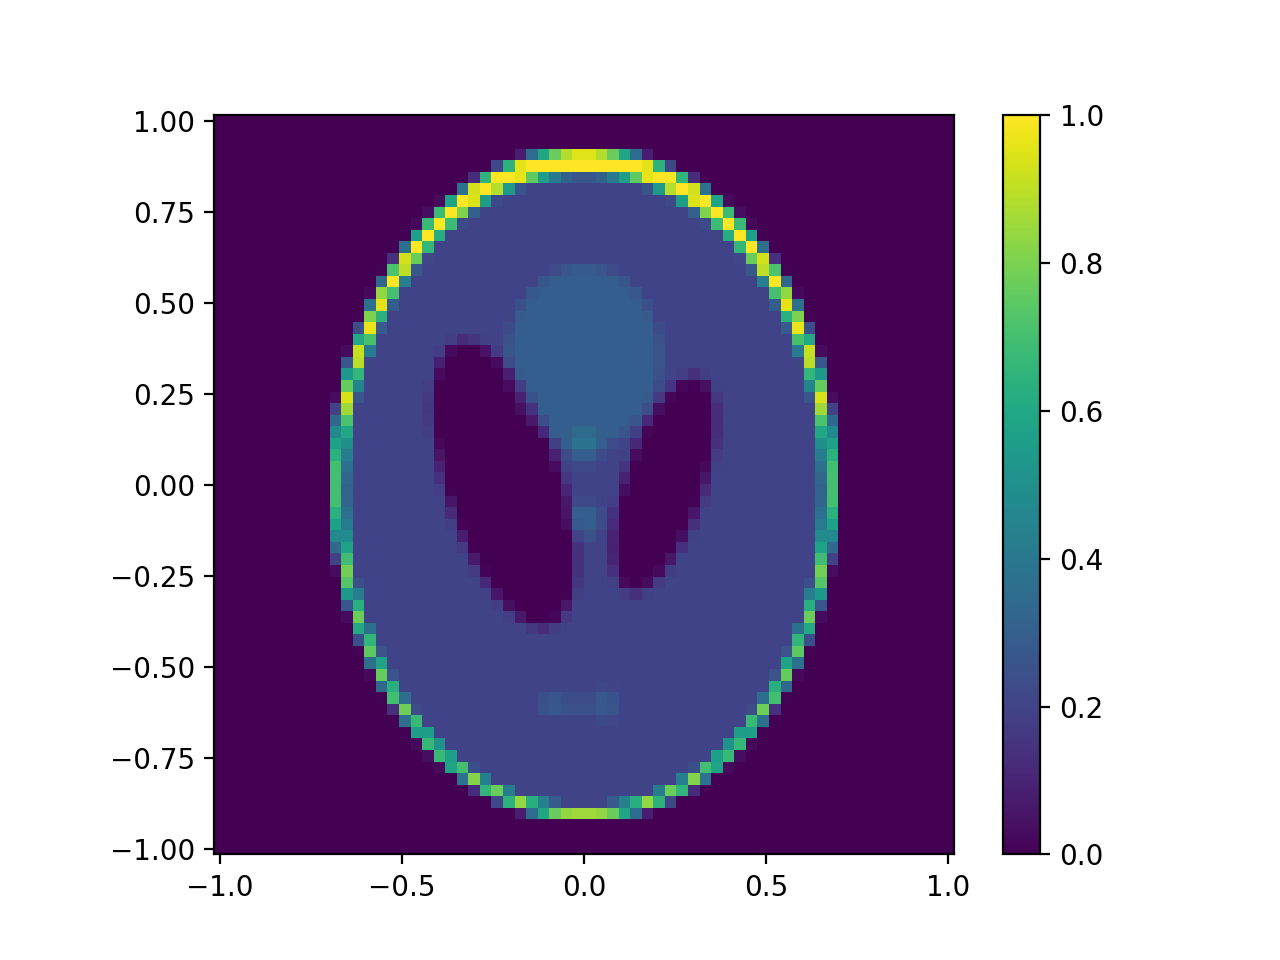

In [9]:
fig, ax = plt.subplots()
im = grid.plot(ax, x)
fig.colorbar(im);

In [10]:
y_R = R @ x.flat
y_R.shape = Na, Np

In [11]:
y = p.sinogram(grid_y, rect=True)

<IPython.core.display.Javascript object>


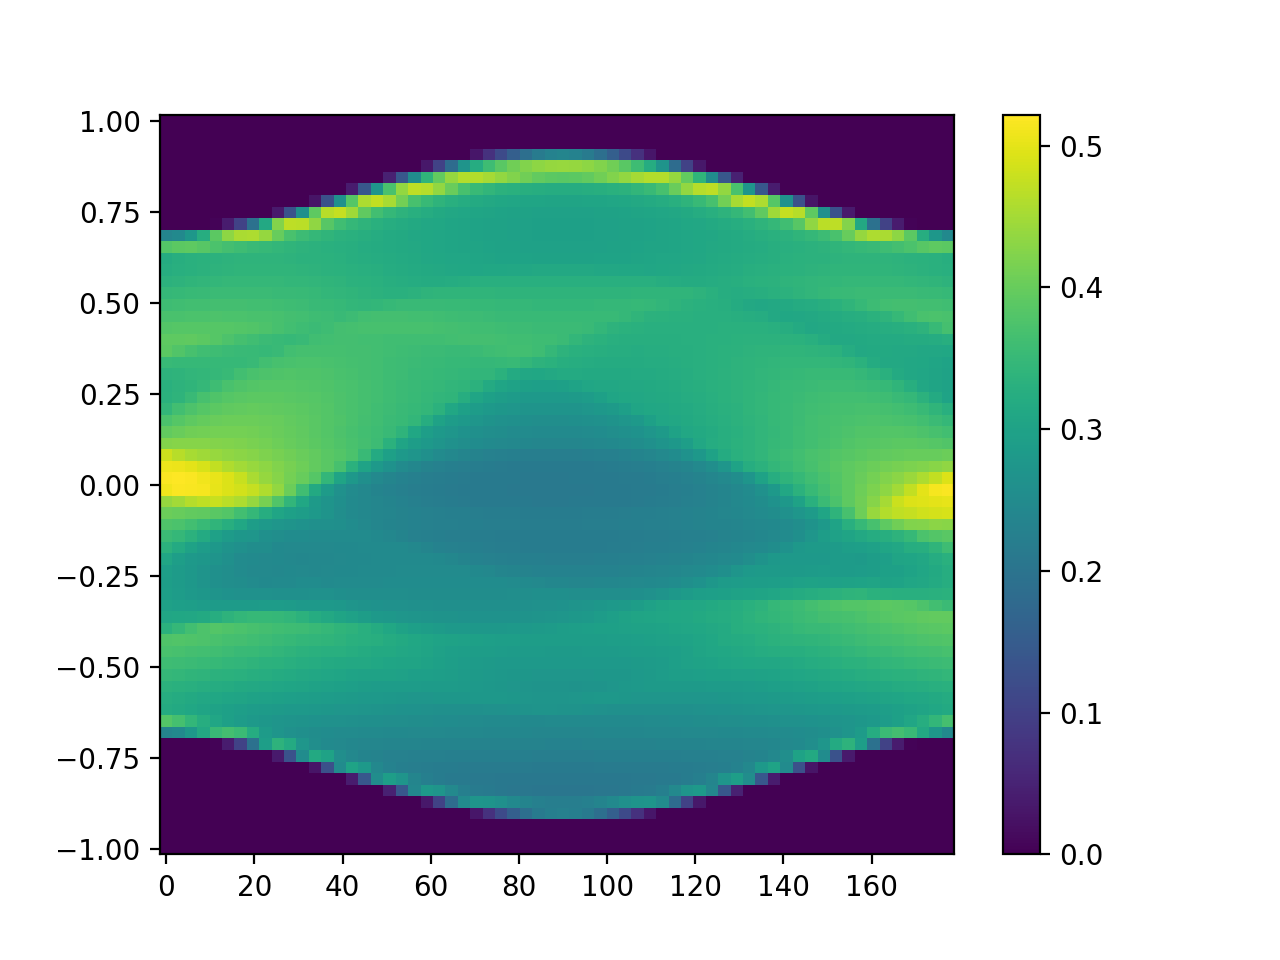

In [12]:
fig, ax = plt.subplots()
im = grid_y.plot(ax, y, aspect='auto')
fig.colorbar(im);

<IPython.core.display.Javascript object>


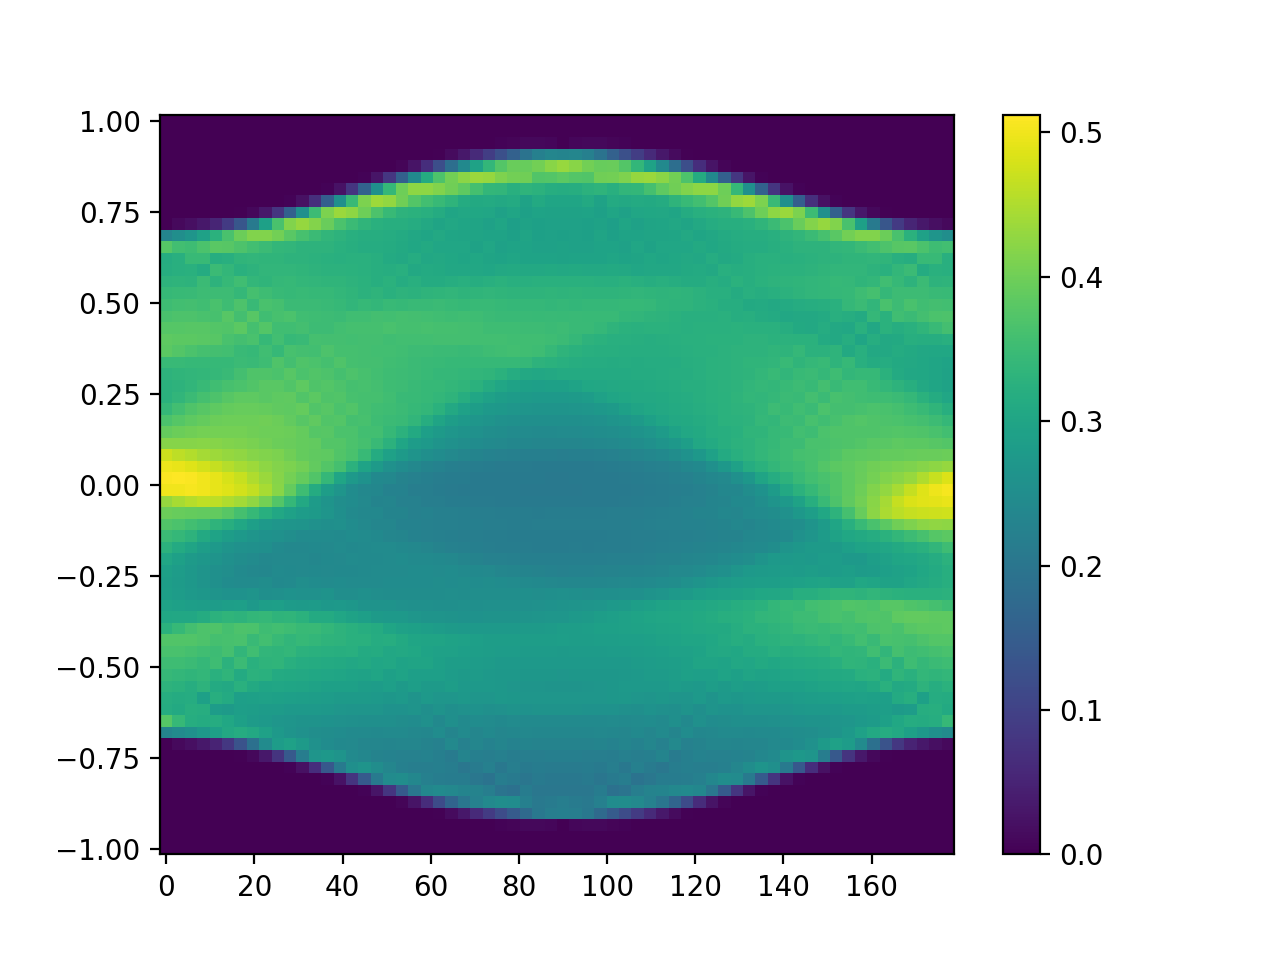

In [13]:
fig, ax = plt.subplots()
im = grid_y.plot(ax, y_R, aspect='auto')
fig.colorbar(im);

In [14]:
y.shape

(64, 64)

In [15]:
# TOO SLOW FOR 128x128 128x128 case
x_hat = scipy.sparse.linalg.spsolve(R, y.flat)
x_hat.shape = Ny, Nx

<IPython.core.display.Javascript object>


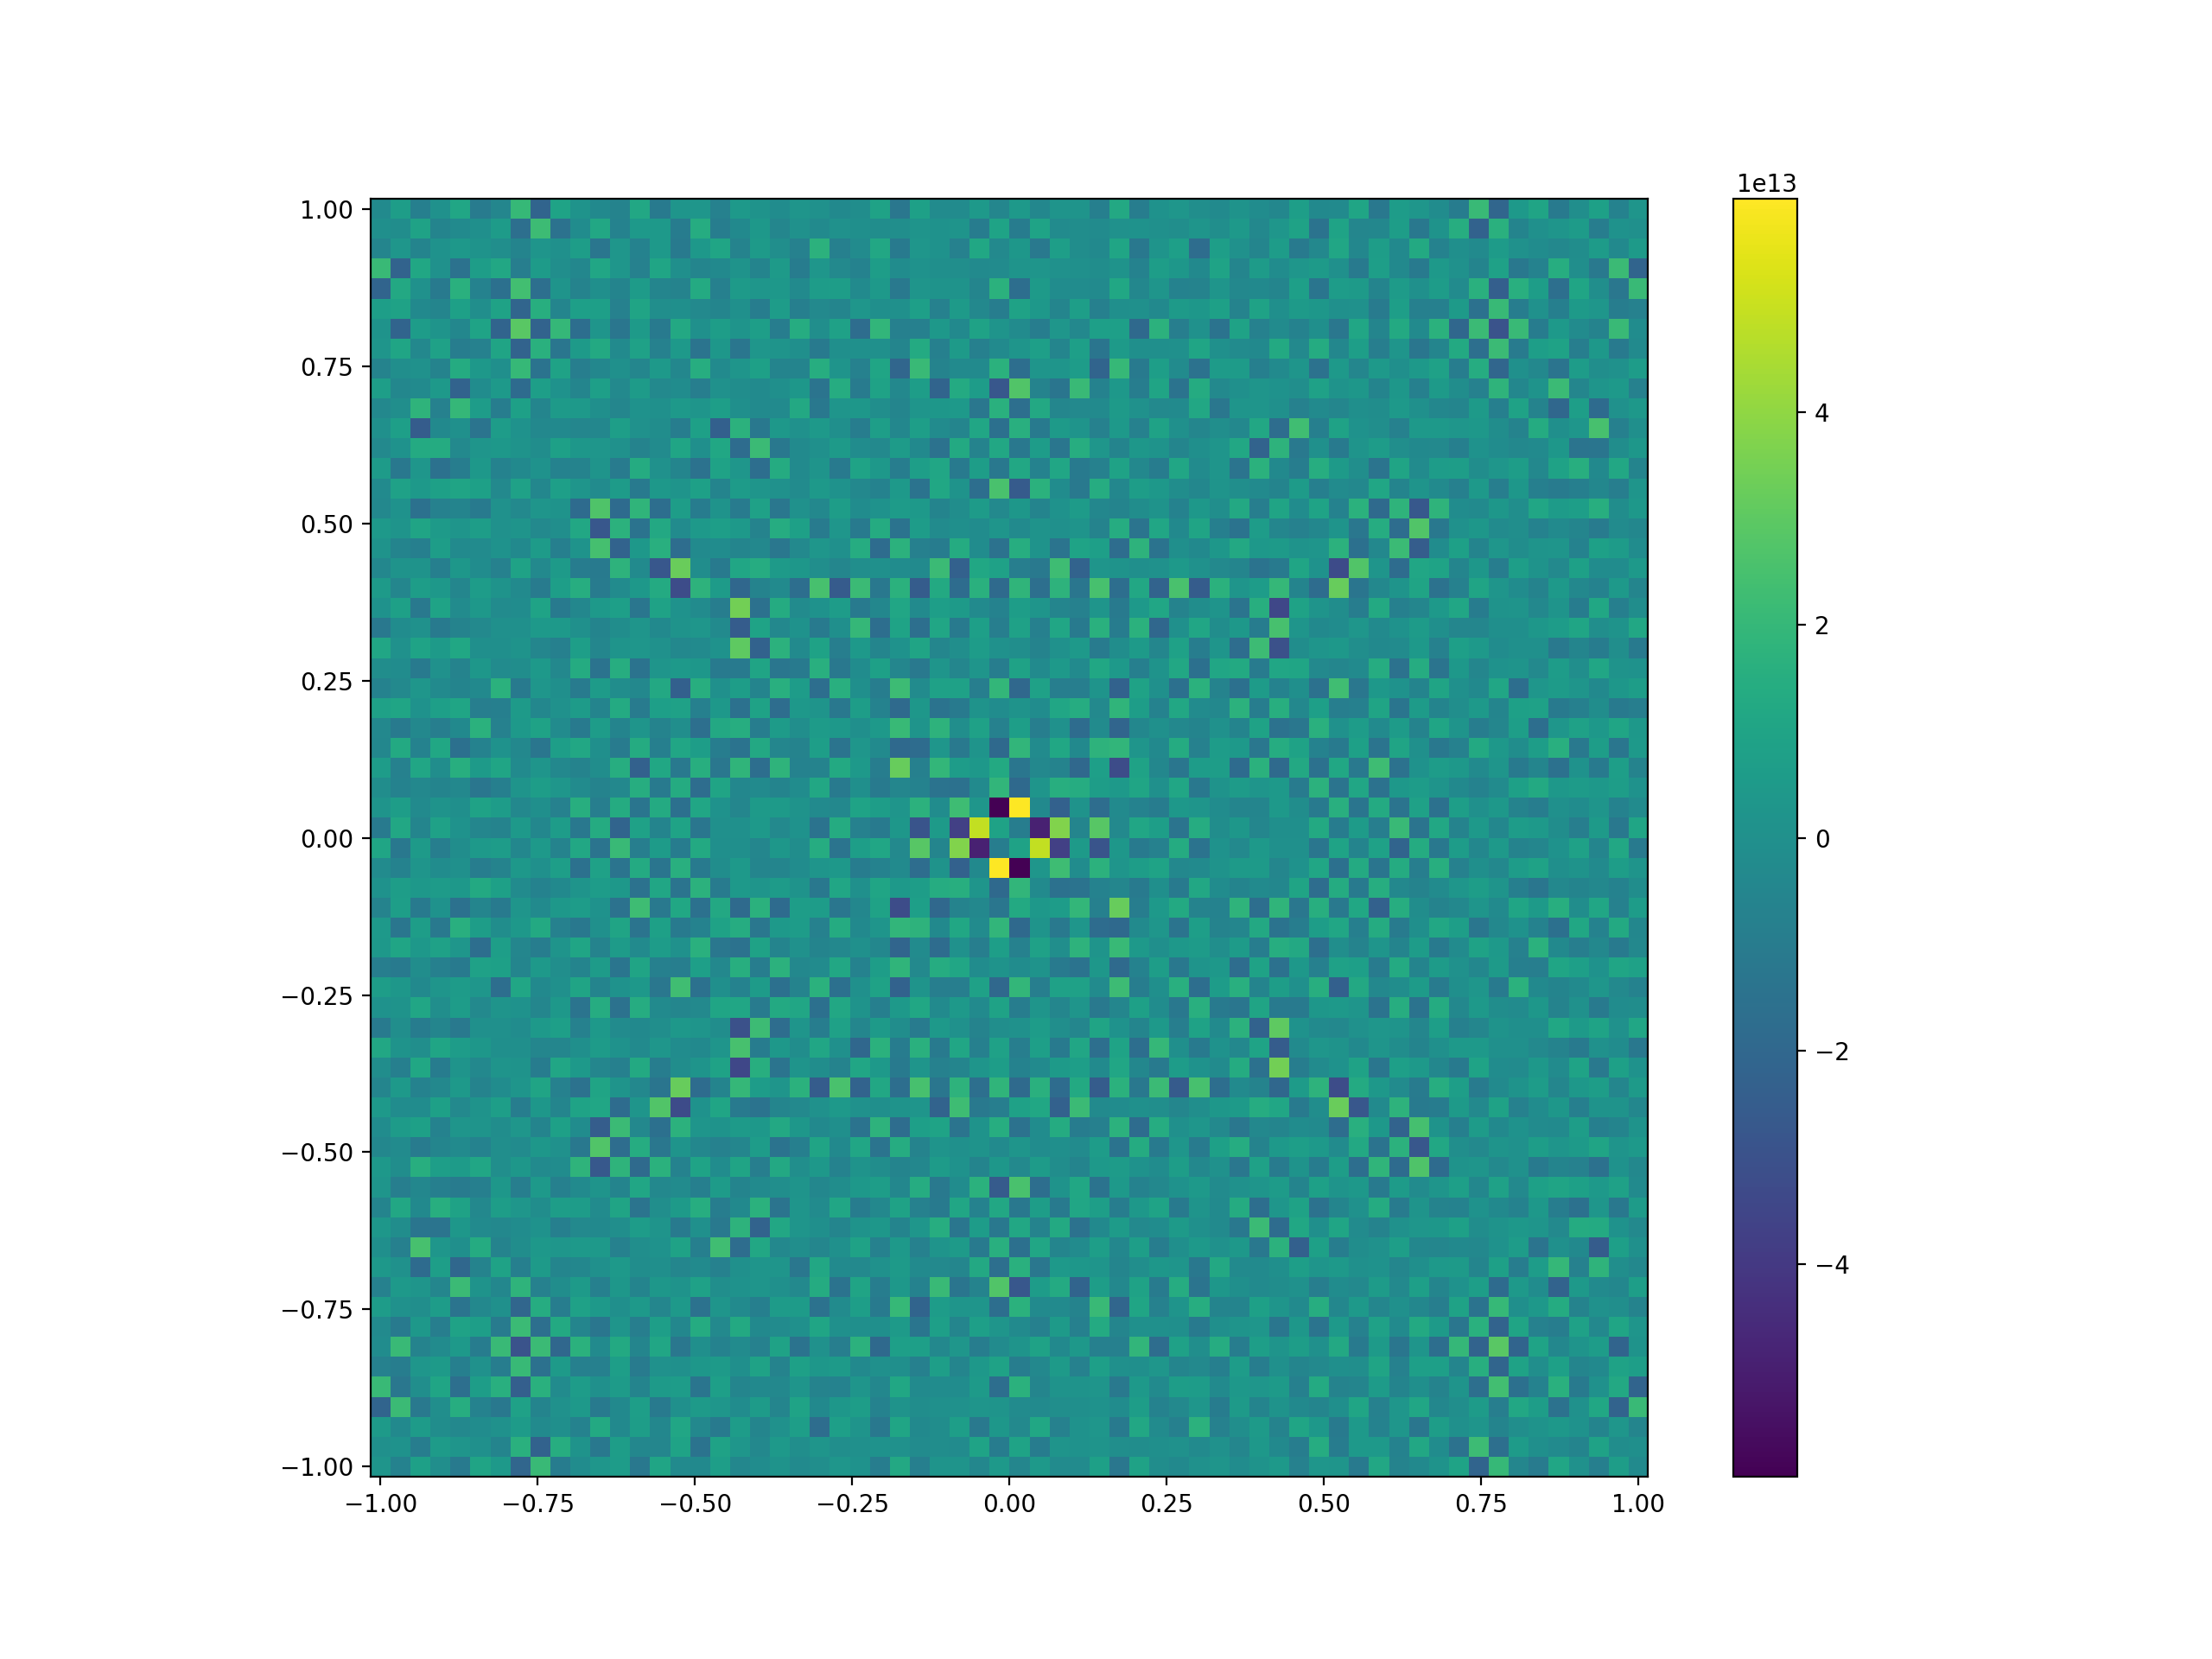

In [16]:
fig, ax = plt.subplots()
im = grid.plot(ax, x_hat)
fig.colorbar(im);

In [17]:
R.shape

(4096, 4096)

In [18]:
#I = scipy.sparse.eye(Ny*Nx, Ny*Nx)
lambda_reg = 1e-1

In [19]:
#A_prime = scipy.sparse.vstack((R, np.sqrt(lambda_reg) * I)).tocsr()
#b_prime = np.vstack((y.flat, np.zeros(Ny*Nx)))

In [20]:
res = scipy.sparse.linalg.lsqr(R, y.flat, damp=np.sqrt(lambda_reg))
x_hat_reg = res[0]
x_hat_reg.shape = Ny, Nx
print(res[1])

2


<IPython.core.display.Javascript object>


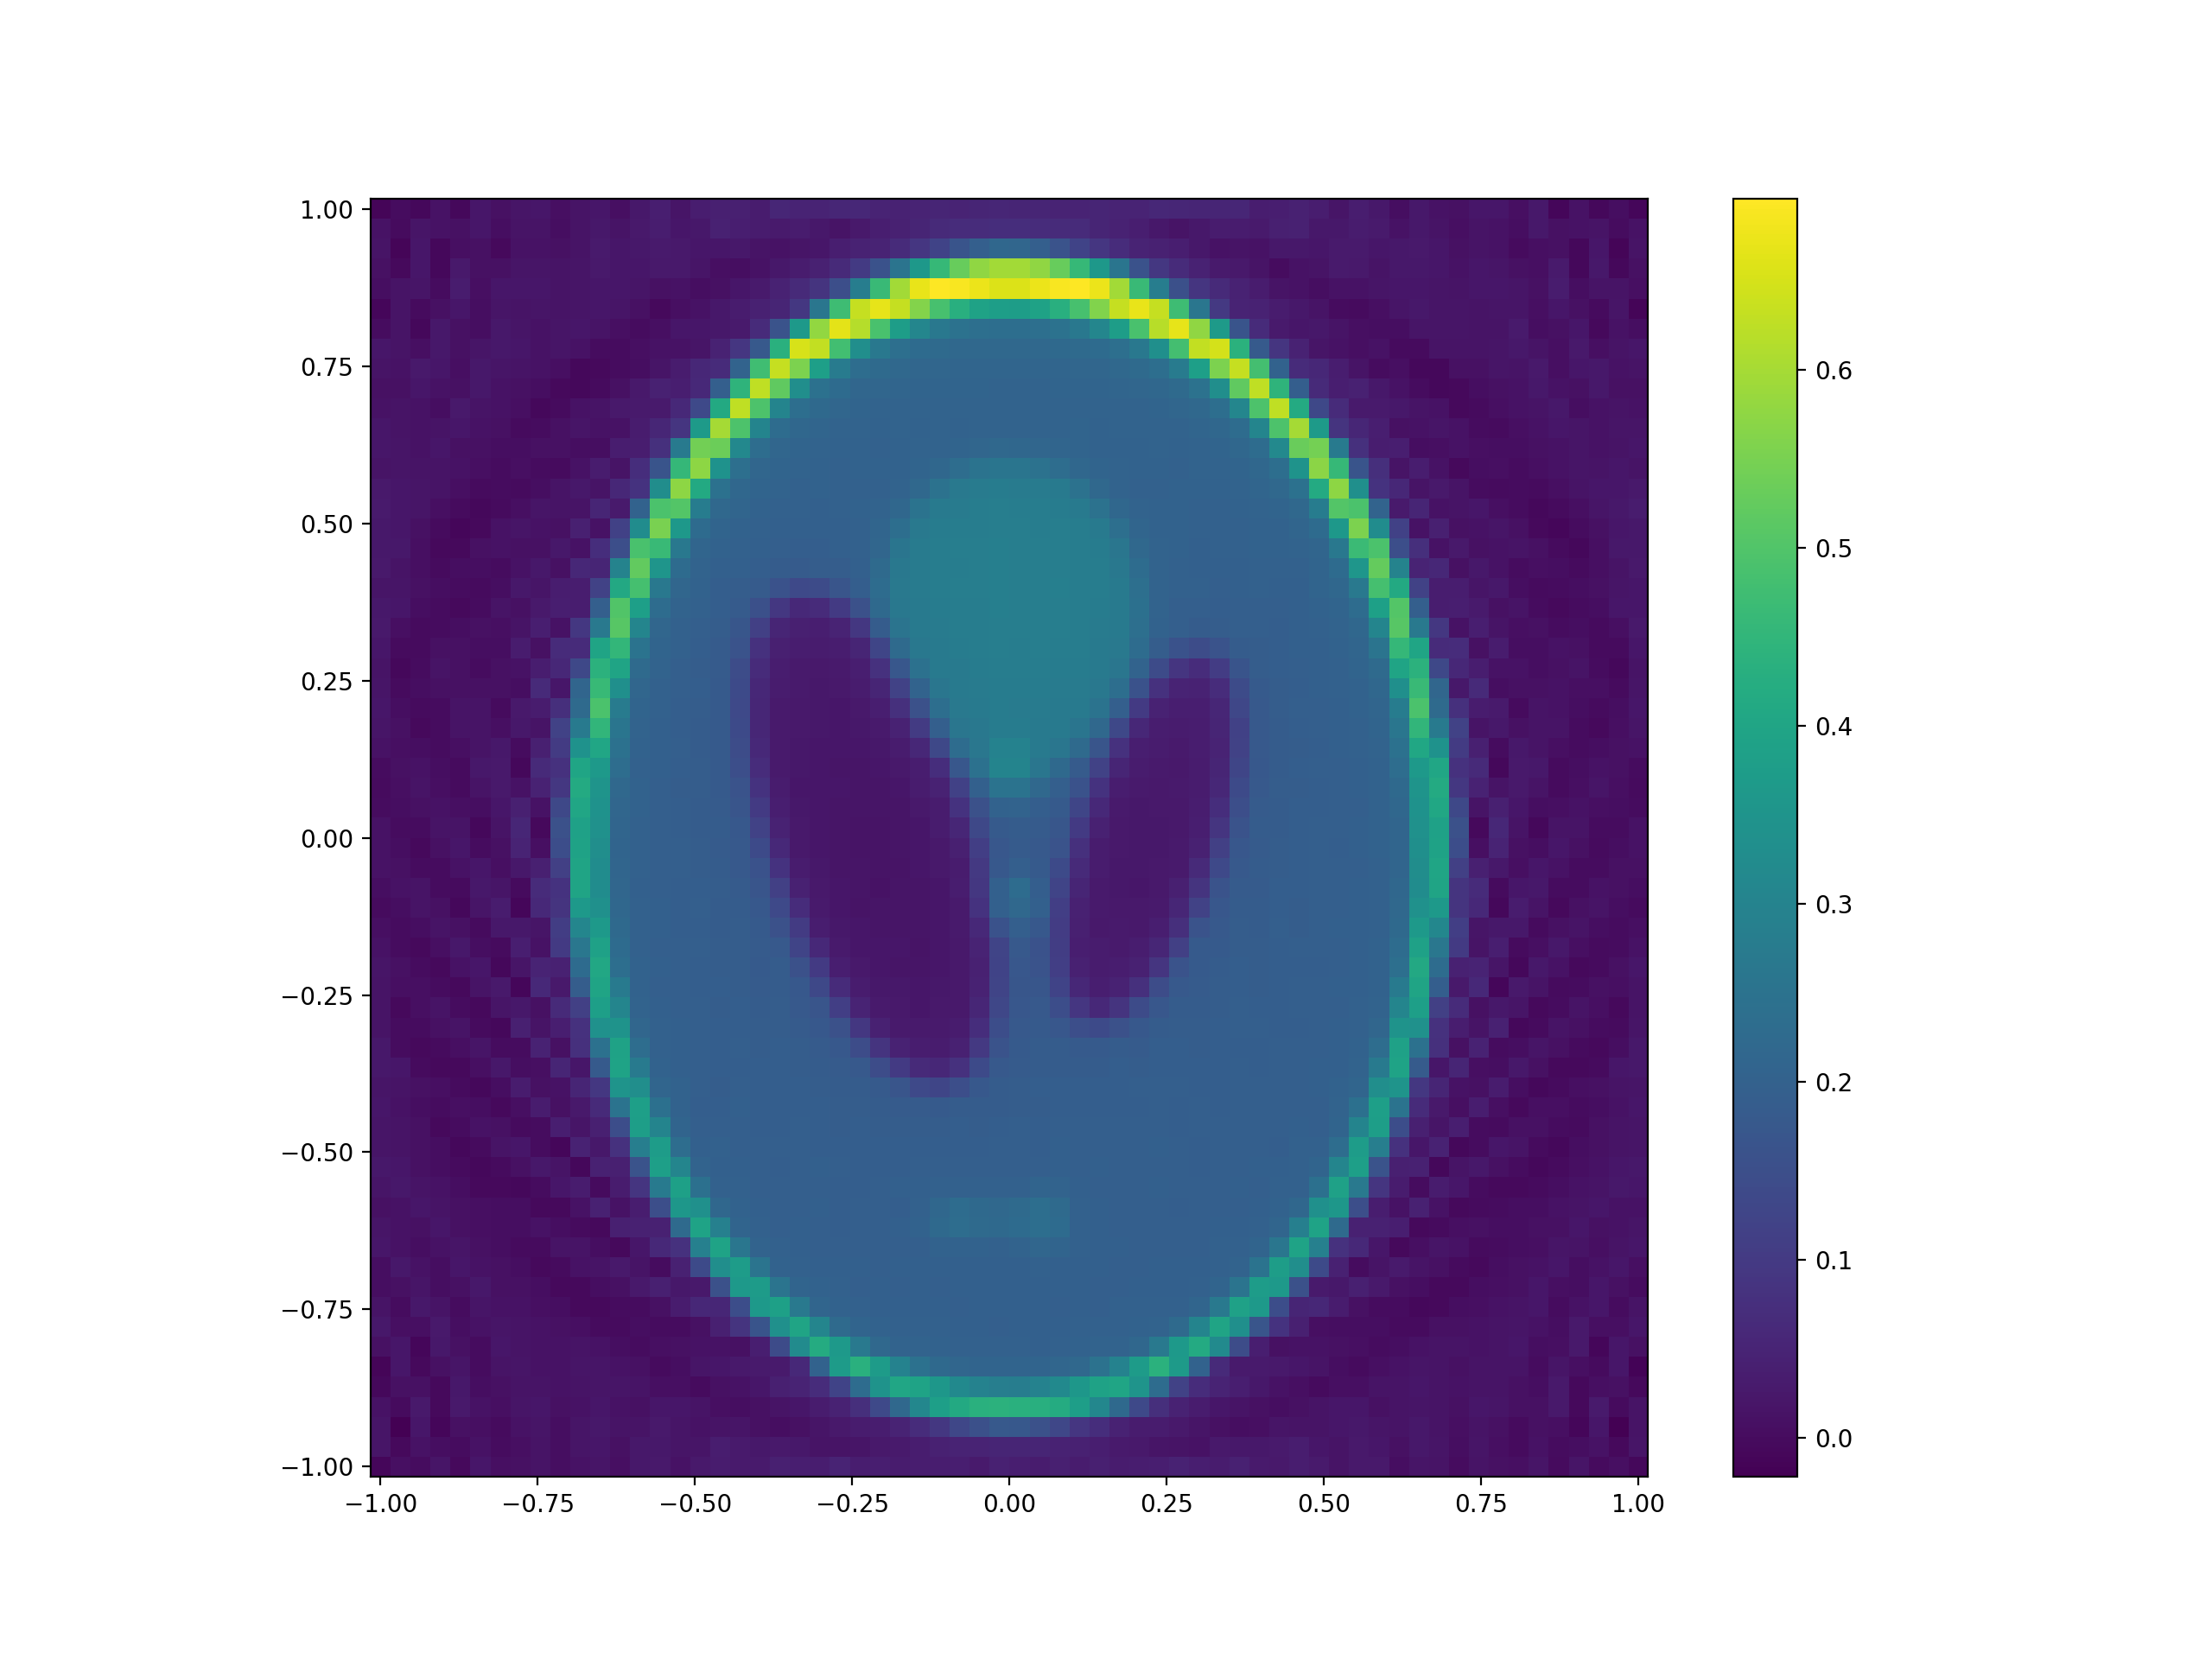

In [21]:
fig, ax = plt.subplots()
im = grid.plot(ax, x_hat_reg)
fig.colorbar(im);